In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.base import ClassifierMixin
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,)
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/company-bankruptcy-prediction/data.csv


(1)read data 

In [4]:
df=pd.read_csv("/kaggle/input/company-bankruptcy-prediction/data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
#check missing value
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

> # (2) EDA 

<AxesSubplot:title={'center':'Class Balance'}, xlabel='Bankrupt', ylabel='Frequency'>

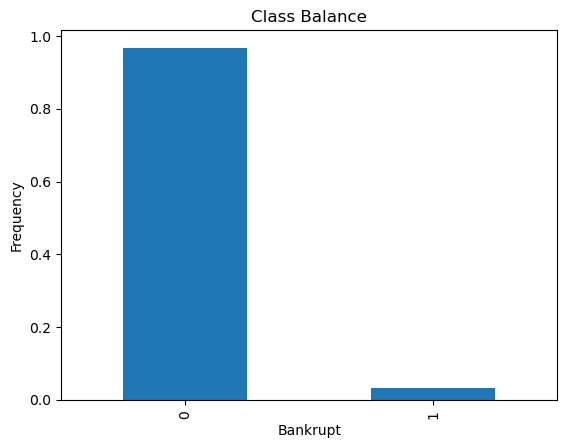

In [14]:
df["Bankrupt?"].value_counts(normalize=True).plot(
    kind = "bar",
    xlabel = "Bankrupt",
    ylabel = "Frequency",
    title = "Class Balance"
)

there are unbalanced in the data, so we used one of the method to treatment this unbalanced called (Resample) 

<AxesSubplot:>

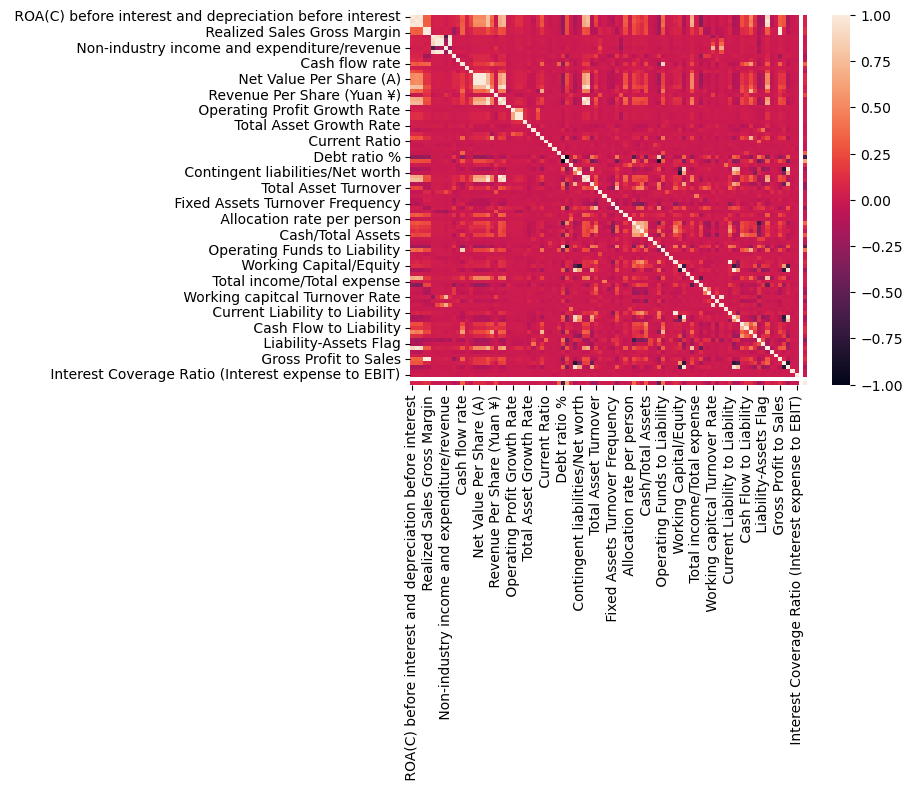

In [18]:
corr =df.drop(columns="Bankrupt?").corr()
sns.heatmap(corr)

> # (3)split data

In [20]:
target = "Bankrupt?"
X = df.drop(columns="Bankrupt?")
y =df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6819, 95)
y shape: (6819,)


In [21]:
X_train, X_test, y_train, y_test =train_test_split(
    X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5455, 95)
y_train shape: (5455,)
X_test shape: (1364, 95)
y_test shape: (1364,)


> # (4) Resample
________________________________________________________________
Resampling is a method that involves repeatedly drawing samples from the training dataset. These samples are then used to refit a specific model to retrieve more information about the fitted model. The aim is to gather more information about a sample and improve the accuracy and estimate the uncertainty


* **Under-sampling** is when you remove samples from the majority class, to provide more balance. 

* **Over-sampling** is when you duplicate random samples from the minority class due to insufficient data collected. 

In [22]:
under_sampler=RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)
X_train_under.head()

(338, 95)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.547409,0.597580,0.583757,0.604707,0.604707,0.999089,0.797593,0.809456,0.303629,0.781726,...,0.831586,0.001479,0.624287,0.604706,0.842928,0.279743,0.026801,0.565205,1,0.029354
1,0.575196,0.622928,0.609187,0.606142,0.606142,0.999085,0.797859,0.809654,0.304102,0.781934,...,0.845096,0.001891,0.624553,0.606139,0.843117,0.277089,0.026791,0.565159,1,0.050445
2,0.490567,0.552933,0.539483,0.629665,0.629520,0.999108,0.797607,0.809484,0.303613,0.781755,...,0.810341,0.001115,0.624214,0.629664,0.840741,0.275084,0.026791,0.565158,1,0.250781
3,0.543899,0.598779,0.593180,0.602740,0.602754,0.999041,0.797495,0.809399,0.303559,0.781664,...,0.828565,0.001621,0.623379,0.602735,0.843240,0.282201,0.026865,0.565489,1,0.023104
4,0.608980,0.658689,0.655174,0.612491,0.613183,0.999193,0.798374,0.810111,0.304774,0.782440,...,0.867959,0.010567,0.621156,0.612491,0.843773,0.275537,0.026791,0.565158,1,0.123342


In [23]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over =over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(10572, 95)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,1,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,1,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,1,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,1,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,1,0.023328


> # (4) Build Model
______________________________
* Baseline

* Iterate

   **1- RandomForestClassifier**
   
   **2- Gradient Boosting Trees**


In [24]:
# Baseline 
acc_baseline = y_train.value_counts(normalize=True)
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0    0.969
1    0.031
Name: Bankrupt?, dtype: float64


In [46]:
# Iterate

# Create a dictionary with the range of hyperparameters
params = {
    'n_estimators':[25,50,75,100],
    'max_depth':[10,20,30,40]
}

#Create a based model
clf_rf =RandomForestClassifier( random_state=42)

#Create a GridSearchCV
model=GridSearchCV(estimator =clf_rf,
                         param_grid =params, 
                         cv = 5,
                         verbose=1, 
                         n_jobs = -1)

# #Fit model
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'n_estimators': [25, 50, 75, 100]},
             verbose=1)

In [48]:
#Extract the cross-validation results from model and load them into a DataFrame named cv_results.
cv_results =pd.DataFrame(model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.018206,0.011377,0.019336,0.001622,10,25,"{'max_depth': 10, 'n_estimators': 25}",0.979196,0.977778,0.980132,0.978713,0.979659,0.979096,0.000811,14
1,2.064529,0.076456,0.035958,0.007187,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.979669,0.979196,0.980132,0.979186,0.979186,0.979474,0.000378,13
2,3.055760,0.039947,0.047987,0.011497,10,75,"{'max_depth': 10, 'n_estimators': 75}",0.979196,0.980142,0.977294,0.979659,0.978713,0.979001,0.000977,15
3,3.980040,0.015947,0.052495,0.001343,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.978723,0.979196,0.977767,0.979659,0.978240,0.978717,0.000670,16
4,1.252950,0.013986,0.018595,0.000379,20,25,"{'max_depth': 20, 'n_estimators': 25}",0.985816,0.985816,0.990066,0.988647,0.988647,0.987798,0.001700,12


In [52]:
# Extract best hyperparameters
best_params = model.best_params_
best_params

{'max_depth': 40, 'n_estimators': 50}

In [63]:
# Create a dictionary with the range of hyperparameters
params = {
    'n_estimators':[20,25,30,35],
    'max_depth':[2,3,4,5]
}

#Create a based model
clf_gb = GradientBoostingClassifier(random_state=42)

#Create a GridSearchCV
model2=GridSearchCV(estimator =clf_gb,
                         param_grid =params, 
                         cv = 5,
                         verbose=1, 
                         n_jobs = -1)

# #Fit model
model2.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [20, 25, 30, 35]},
             verbose=1)

In [65]:
# Extract best hyperparameters
model2.best_params_

{'max_depth': 5, 'n_estimators': 35}

> # (5) Evaluate
__________________________________

 1- RandomForestClassifier

 2- Gradient Boosting Trees

# 1- RandomForestClassifier

In [53]:
acc_train =model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)
print("Training Accuracy:", round(acc_train, 4))
print("_"*30)
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
______________________________
Test Accuracy: 0.9663


In [54]:
y_test.value_counts()

0    1313
1      51
Name: Bankrupt?, dtype: int64

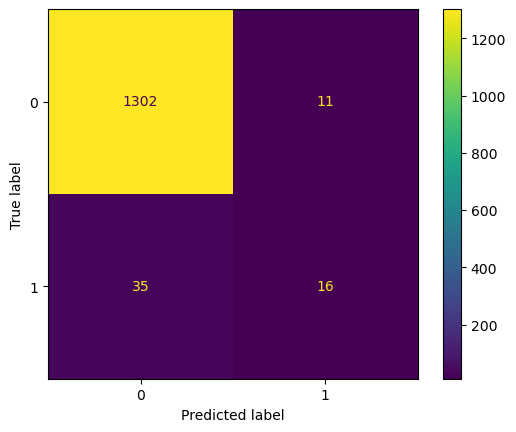

In [55]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

# 2- Gradient Boosting Trees

In [66]:
acc_train =model2.score(X_train, y_train)
acc_test = model2.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9754
Validation Accuracy: 0.9435


In [74]:
print(classification_report(y_test,model2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1313
           1       0.36      0.65      0.46        51

    accuracy                           0.94      1364
   macro avg       0.67      0.80      0.72      1364
weighted avg       0.96      0.94      0.95      1364

